# Time Series Analysis on Zillow's Housing Data

Here I will perform Time series analysis using Zillow's historical median house prices for US.

In [1]:
# Import Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
# Set max numbers of columns
pd.set_option('display.max_columns', 999)

In [3]:
# Load Data
df = pd.read_csv("./data/zillow_data.csv")

In [4]:
# Preview Data
df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,245762.0,244232.0,244314.0,244287.0,244846.0,245526.0,245406.0,246266.0,246641.0,248353.0,249668.0,251318.0,252860.0,255909.0,257636.0,258614.0,259493.0,260418.0,263194.0,263764.0,265498.0,265136.0,267245.0,270004.0,273639.0,277116.0,281539.0,286654.0,290705.0,294973.0,297694.0,302963.0,308026.0,314930.0,318923.0,321774.0,324727.0,327753.0,330959.0,333259.0,337774.0,343213.0,351829.0,360090.0,369372.0,377426.0,386327.0,395142.0,402040.0,409852.0,417689.0,428344.0,437974.0,446988.0,455658.0,463040.0,470057.0,476519.0,485640.0,495412.0,507206.0,518089.0,529566.0,538063.0,544358.0,5

In [5]:
# Check Data Shape
df.shape

(30415, 305)

In [6]:
# Check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30415 entries, 0 to 30414
Columns: 305 entries, RegionID to 2020-08-31
dtypes: float64(296), int64(3), object(6)
memory usage: 70.8+ MB


In [7]:
# Select unique state values 
df['State'].unique()

array(['NY', 'IL', 'TX', 'CA', 'TN', 'FL', 'DC', 'NC', 'GA', 'OK', 'MO',
       'NJ', 'WA', 'AZ', 'MD', 'VA', 'MA', 'CO', 'MI', 'OH', 'KS', 'PA',
       'NM', 'OR', 'CT', 'NV', 'IN', 'SC', 'KY', 'AL', 'ND', 'MN', 'AR',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'WV', 'SD',
       'NE', 'IA', 'RI', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [1]:
# Select unique state values 
df['State'].unique().count()

NameError: name 'df' is not defined

In [17]:
df.groupby('State')['RegionName'].nunique()

State
AK      55
AL     604
AR     560
AZ     342
CA    1686
CO     495
CT     272
DC      23
DE      65
FL     954
GA     700
HI      83
IA     962
ID     262
IL    1277
IN     804
KS     521
KY     700
LA     452
MA     521
MD     465
ME     370
MI     947
MN     857
MO     939
MS     372
MT     270
NC     790
ND     168
NE     474
NH     239
NJ     584
NM     234
NV     158
NY    1743
OH    1200
OK     625
OR     403
PA    1723
RI      77
SC     389
SD     184
TN     614
TX    1795
UT     240
VA     860
VT     253
WA     570
WI     752
WV     638
WY     144
Name: RegionName, dtype: int64

In [22]:
# Check what we have in SizeRank - info about cities
print(df.SizeRank.describe())

count    30415.000000
mean     15954.570015
std       9583.721905
min          0.000000
25%       7689.000000
50%      15487.000000
75%      24018.000000
max      35187.000000
Name: SizeRank, dtype: float64


In [24]:
# Calculate the 20% cutoff value.
sr_20 = df.SizeRank.quantile(q=0.20)
print(sr_20)

6150.8


In [27]:
# Create a dataframe with Zipcodes 
zc_top20= df[df['SizeRank']<sr_20].drop(['RegionID','City','State','Metro','CountyName','SizeRank'],axis=1)
zc_top20.shape
#print(f'Amount of zipcodes: {len(zc_top20)}')

(6083, 299)

In [28]:
zc_top20

,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,10025,Zip,NY,245762.0,244232.0,244314.0,244287.0,244846.0,245526.0,245406.0,246266.0,246641.0,248353.0,249668.0,251318.0,252860.0,255909.0,257636.0,258614.0,259493.0,260418.0,263194.0,263764.0,265498.0,265136.0,267245.0,270004.0,273639.0,277116.0,281539.0,286654.0,290705.0,294973.0,297694.0,302963.0,308026.0,314930.0,318923.0,321774.0,324727.0,327753.0,330959.0,333259.0,337774.0,343213.0,351829.0,360090.0,369372.0,377426.0,386327.0,395142.0,402040.0,409852.0,417689.0,428344.0,437974.0,446988.0,455658.0,463040.0,470057.0,476519.0,485640.0,495412.0,507206.0,518089.0,529566.0,538063.0,544358.0,549124.0,552896.0,557645.0,562916.0,570103.0,575674.0,581835.0,586336.0,591553.0,595539.0,601444.0,606905.0,611

In [8]:
# Create a new dataframe with only one state 
df_ny = df[df["State"]=="NY"]

In [9]:
df_ny.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,245762.0,244232.0,244314.0,244287.0,244846.0,245526.0,245406.0,246266.0,246641.0,248353.0,249668.0,251318.0,252860.0,255909.0,257636.0,258614.0,259493.0,260418.0,263194.0,263764.0,265498.0,265136.0,267245.0,270004.0,273639.0,277116.0,281539.0,286654.0,290705.0,294973.0,297694.0,302963.0,308026.0,314930.0,318923.0,321774.0,324727.0,327753.0,330959.0,333259.0,337774.0,343213.0,351829.0,360090.0,369372.0,377426.0,386327.0,395142.0,402040.0,409852.0,417689.0,428344.0,437974.0,446988.0,455658.0,463040.0,470057.0,476519.0,485640.0,495412.0,507206.0,518089.0,529566.0,538063.0,544358.0,5

In [10]:
# Drop some columns
df_ny = df_ny.drop(["RegionID", "SizeRank", "RegionType", "StateName", "State", "City", "Metro", "CountyName"], axis=1)

In [11]:
# Rename column RegionName to ZipCode
df_ny.rename(columns={'RegionName': 'zipcode'}, inplace=True)
df_ny.head()

,zipcode,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,10025,245762.0,244232.0,244314.0,244287.0,244846.0,245526.0,245406.0,246266.0,246641.0,248353.0,249668.0,251318.0,252860.0,255909.0,257636.0,258614.0,259493.0,260418.0,263194.0,263764.0,265498.0,265136.0,267245.0,270004.0,273639.0,277116.0,281539.0,286654.0,290705.0,294973.0,297694.0,302963.0,308026.0,314930.0,318923.0,321774.0,324727.0,327753.0,330959.0,333259.0,337774.0,343213.0,351829.0,360090.0,369372.0,377426.0,386327.0,395142.0,402040.0,409852.0,417689.0,428344.0,437974.0,446988.0,455658.0,463040.0,470057.0,476519.0,485640.0,495412.0,507206.0,518089.0,529566.0,538063.0,544358.0,549124.0,552896.0,557645.0,562916.0,570103.0,575674.0,581835.0,586336.0,591553.0,595539.0,601444.0,606905.0,611082.0,612537.0,615179.0,619975.

In [12]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 30393
Columns: 297 entries, zipcode to 2020-08-31
dtypes: float64(296), int64(1)
memory usage: 4.0 MB


In [13]:
# Reset index for dataframe
df_ny.reset_index(drop=True)

,zipcode,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,10025,245762.0,244232.0,244314.0,244287.0,244846.0,245526.0,245406.0,246266.0,246641.0,248353.0,249668.0,251318.0,252860.0,255909.0,257636.0,258614.0,259493.0,260418.0,263194.0,263764.0,265498.0,265136.0,267245.0,270004.0,273639.0,277116.0,281539.0,286654.0,290705.0,294973.0,297694.0,302963.0,308026.0,314930.0,318923.0,321774.0,324727.0,327753.0,330959.0,333259.0,337774.0,343213.0,351829.0,360090.0,369372.0,377426.0,386327.0,395142.0,402040.0,409852.0,417689.0,428344.0,437974.0,446988.0,455658.0,463040.0,470057.0,476519.0,485640.0,495412.0,507206.0,518089.0,529566.0,538063.0,544358.0,549124.0,552896.0,557645.0,562916.0,570103.0,575674.0,581835.0,586336.0,591553.0,595539.0,601444.0,606905.0,611082.0,612537.0,615179.0,619975.

In [14]:
# Change type for ZipCode
df_ny["zipcode"] = df_ny["zipcode"].astype(str)

In [15]:
# Transpose dates to rows
df_ny = df_ny.transpose()
df_ny.head()

,0,2,6,10,11,14,18,19,20,24,28,30,40,47,48,51,53,57,58,60,62,64,74,83,85,89,95,105,108,109,117,120,121,123,127,153,163,179,180,201,213,230,244,249,265,275,306,313,323,366,369,372,373,389,411,413,422,436,491,496,505,509,511,540,548,575,599,647,694,705,720,725,781,784,785,809,812,814,850,888,915,932,937,947,949,977,980,990,1020,1060,1068,1116,1143,1156,1157,1167,1170,1176,1210,1236,1257,1296,1369,1408,1452,1462,1482,1484,1522,1557,1561,1571,1640,1651,1660,1696,1734,1780,1782,1790,1791,1862,1886,1923,1940,1976,1998,2027,2036,2069,2102,2116,2118,2119,2136,2203,2212,2264,2270,2273,2290,2343,2353,2365,2380,2436,2462,2468,2489,2535,2571,2581,2590,2613,2629,2658,2724,2783,2788,2822,2874,2888,2915,2947,2962,2994,3014,3043,3067,3089,3136,3143,3193,3197,3244,3265,3288,3294,3308,3376,3404,3454,3466,3468,3471,3476,3487,3517,3594,3632,3640,3650,3683,3686,3709,3764,3781,3802,3823,3835,3870,3903,3942,3967,4071,4077,4089,4153,4163,4183,4335,4360,4401,4407,4413,4439,4463,4464,4524,4539,4543,4549,4667,4673,4694,4707,4768,4770,4788,4798,4846,4871,4883,4897,4901,4907,4914,4948,4981,4997,5025,5033,5040,5052,5073,5076,5079,5084,5131,5132,5152,5182,5223,5234,5277,5332,5342,5356,5367,5441,5479,5483,5486,5501,5517,5527,5544,5547,5596,5606,5613,5648,5672,5681,5693,5694,5707,5710,5724,5728,5758,5800,5843,5849,5854,5878,5952,5965,5987,5988,6036,6038,6040,6044,6054,6071,6083,6123,6124,6133,6141,6156,6177,6189,6191,6199,6200,6233,6264,6274,6292,6353,6365,6372,6377,6390,6408,6410,6418,6432,6436,6456,6490,6497,6512,6534,6549,6553,6561,6589,6593,6630,6644,6645,6657,6662,6675,6732,6752,6767,6807,6812,6813,6822,6836,6844,6851,6858,6886,6904,6929,6938,6971,7014,7021,7154,7158,7215,7233,7237,7242,7243,7244,7266,7274,7297,7320,7335,7390,7411,7415,7455,7467,7472,7479,7489,7505,7519,7523,7548,7588,7591,7602,7625,7627,7802,7803,7846,7856,7875,7906,7907,7937,7941,7942,7946,7955,7961,7966,7985,7995,8013,8016,8024,8045,8080,8082,8091,8095,8103,8123,8125,8142,8146,8181,8192,8194,8248,8291,8300,8311,8319,8358,8385,8412,8450,8451,8453,8454,8477,8489,8494,8501,8508,8517,8566,8581,8582,8611,8623,8625,8638,8683,8699,8707,8720,8741,8761,8773,8784,8785,8787,8797,8804,8812,8851,8866,9002,9008,9014,9034,9053,9075,9131,9147,9163,9193,9204,9217,9226,9248,9258,9294,9319,9330,9354,9361,9363,9378,9391,9416,9419,9425,9435,9446,9456,9469,9497,9504,9517,9542,9546,9560,9569,9588,9591,9594,9599,9609,...,21227,21311,21312,21321,21322,21323,21368,21427,21460,21469,21507,21515,21522,21531,21541,21561,21573,21574,21575,21578,21587,21593,21632,21667,21671,21676,21688,21691,21703,21719,21742,21750,21761,21780,21781,21818,21825,21833,21854,21858,21873,21906,21915,21920,21928,21971,21977,21990,22006,22019,22060,22062,22085,22110,22115,22120,22123,22125,22138,22163,22170,22184,22215,22218,22232,22242,22246,22302,22304,22306,22361,22380,22467,22488,22493,22515,22530,22534,22548,22549,22595,22599,22602,22615,22638,22689,22707,22770,22775,22810,22813,22825,22829,22865,22876,22900,22901,22957,22967,22983,23005,23010,23018,23025,23056,23066,23077,23088,23106,23107,23146,23170,23217,23289,23291,23347,23353,23356,23423,23437,23443,23445,23482,23491,23517,23529,23530,23540,23572,23596,23620,23657,23670,23688,23689,23727,23750,23764,23776,23781,23808,23820,23831,23835,23852,23873,23874,23890,23919,23992,24011,24044,24045,24057,24066,24067,24079,24098,24099,24118,24157,24172,24173,24197,24215,24222,24240,24242,24255,24260,24262,24263,24299,24309,24325,24340,24362,24369,24371,24388,24398,24405,24428,24433,24453,24505,24533,24537,24591,24641,24646,24667,24668,24679,24683,24697,24698,24703,24729,24749,24751,24831,24868,24883,24908,24943,24946,24954,24991,25023,25032,25060,25073,25079,25105,25113,25116,25118,25129,25157,25172,25193,25209,25264,25271,25288,25306,25346,25403,25415,25417,25422,25454,25475,25520,25553,25614,25619,25622,25624,25674,25683,25701,25714,25725,25732,25755,25812,25816,25860,25885,25934,25968,25970,25996,26028,26043,26072,26146,26218,26219,26279,26290,26298,26304,26329,26344,26351,26356,2638

In [16]:
# Create a new header from zipcode
header = df_ny.iloc[0]
df_ny = df_ny[1:] 
df_ny.columns = header

In [17]:
df_ny.head(3)

zipcode,10025,10023,10002,11226,10467,10016,11201,11235,11375,10009,10011,10128,11206,10462,10456,10019,10003,11230,11212,10463,11209,11221,10024,11214,11207,11229,10458,11211,11377,10453,11234,11355,11238,10314,11215,14850,11385,10468,11373,10028,11233,10457,10027,11236,10701,11372,11218,11223,10021,14580,14221,11208,11225,11101,11204,11213,11219,10032,11368,11203,11220,10031,11216,14094,12180,11354,10014,11746,10466,10460,10036,11374,10940,10472,10473,12550,11210,10033,11434,12065,11224,14120,11691,14075,10306,13760,10010,12866,14150,10469,10312,11706,11758,10461,14450,10022,11106,11222,14224,14609,11432,10475,11217,11772,13021,10065,13440,13601,11205,10459,10040,10001,11561,14701,12603,11435,10977,11249,11550,14624,10034,12601,11743,12401,10026,14612,11237,14225,11102,10950,11103,10013,11231,12020,11365,11367,10035,14215,13027,12901,10304,12590,10455,13501,10583,10301,10075,11590,11757,13126,11520,10012,10705,13502,14086,10801,11040,11357,11756,10454,10305,14304,14626,14424,14226,10550,12203,11779,11105,10465,11364,10573,11704,14127,14621,12309,13090,11554,14534,14616,12303,11717,10704,11358,12010,11787,10030,11801,11937,12804,11580,12205,12302,14620,11566,11050,14606,13905,10562,13045,10017,11710,12306,11727,11510,11735,11228,11379,11901,14043,11413,13088,11003,14227,11793,10956,12553,10037,10710,10598,11572,14617,11420,11570,14217,12047,11414,11722,12078,11731,12208,14223,13069,10309,10512,10708,11803,11530,14607,11542,10952,14216,11741,10566,11412,11361,11725,14228,14220,14623,10471,11763,12144,14020,12533,11378,11729,11421,10901,14207,11419,14618,11701,13210,10591,11433,13212,11720,14845,14830,11360,12189,10308,10552,11418,10541,11415,10954,12304,13208,13850,14072,14213,13204,12477,14526,13901,11001,11776,14206,14760,14211,14051,12110,13820,11967,11791,13790,11021,12534,11501,11795,14456,14218,11423,11563,13206,11768,11714,11747,10990,13205,11369,10310,11784,12508,13903,10303,10605,11239,10543,11694,14610,11422,10703,11232,12801,11552,11010,11762,11946,14420,14468,11968,13662,13203,12054,10509,10805,11417,14052,11427,12206,11783,14615,10603,14214,14559,12118,13031,14305,12831,13039,11581,11692,12561,14611,10538,14564,12524,13669,11754,11370,13413,13057,13219,10567,14904,10580,10018,13104,14048,10960,12019,14222,12182,10549,11733,11030,11356,11961,11553,11782,10005,10530,11429,11726,13815,13209,11788,12839,11703,10606,11963,11780,12771,12701,12308,11362,14513,13421,11702,14901,11411,10470,10965,13215,13066,11953,11426,14843,14527,14619,10601,12528,14622,12538,10302,14210,11949,14301,14201,14608,10941,14063,14613,11428,13676,11738,12095,14810,13032,13207,10520,12210,11751,10044,10804,14092,11730,14425,14219,13827,14519,11693,13492,11951,11778,12589,12188,11950,12953,10924,11004,11790,11767,12414,10280,13148,14411,10980,11742,14625,12586,10528,11416,11436,12211,11764,14586,11576,14870,14605,13357,10803,14103,11755,11798,13041,13323,12572,13165,14006,10570,14212,14502,11766,11366,12202,10918,14001,11753,11577,10707,14004,11598,10522,13619,14895,...,12929,11739,14753,13315,14726,14054,13144,14728,14091,12847,13615,13334,13750,13477,13630,13322,11548,12836,14723,13061,12989,14506,14480,12092,14860,12751,12956,12746,12913,12136,10919,13684,12719,13318,13780,14102,13368,12028,12785,14805,13328,14037,13810,6390,14859,14841,11547,13157,13081,12967,14822,14740,13788,13752,12130,13485,12985,10501,13303,12824,13864,13464,11972,13635,13680,13739,14815,12934,12732,13693,12151,12153,14784,12175,12861,12469,13690,12473,14744,13147,14836,14066,13122,12503,13782,13071,12960,12482,14026,13744,12786,12406,13813,10597,12568,12763,14729,10517,14069,13319,12494,14717,10535,12160,12190,13325,12457,13360,12873,12765,12585,14769,12150,12942,12187,12434,13337,12035,12878,12914,13802,12022,13486,13454,13681,13665,12412,14126,12777,12156,12760,14842,14897,12945,13470,12164,14825,13672,12749,12837,12860,11430,13756,13777,12936,12791,11765,13682,13355,13844,12863,12950,12527,12952,14748,13072,14777,10578,14720,10988,14855,12108,14819,12808,12405,14113

In [18]:
# Create a new index for dataframe
df_ny.index=pd.to_datetime(df_ny.index)
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 1996-01-31 to 2020-08-31
Columns: 1743 entries, 10025 to 501
dtypes: object(1743)
memory usage: 3.9+ MB


In [23]:
df_ny.fillna(0, inplace=True)

In [24]:
df_ny.astype(int)
df_ny.head()

zipcode,10025,10023,10002,11226,10467,10016,11201,11235,11375,10009,10011,10128,11206,10462,10456,10019,10003,11230,11212,10463,11209,11221,10024,11214,11207,11229,10458,11211,11377,10453,11234,11355,11238,10314,11215,14850,11385,10468,11373,10028,11233,10457,10027,11236,10701,11372,11218,11223,10021,14580,14221,11208,11225,11101,11204,11213,11219,10032,11368,11203,11220,10031,11216,14094,12180,11354,10014,11746,10466,10460,10036,11374,10940,10472,10473,12550,11210,10033,11434,12065,11224,14120,11691,14075,10306,13760,10010,12866,14150,10469,10312,11706,11758,10461,14450,10022,11106,11222,14224,14609,11432,10475,11217,11772,13021,10065,13440,13601,11205,10459,10040,10001,11561,14701,12603,11435,10977,11249,11550,14624,10034,12601,11743,12401,10026,14612,11237,14225,11102,10950,11103,10013,11231,12020,11365,11367,10035,14215,13027,12901,10304,12590,10455,13501,10583,10301,10075,11590,11757,13126,11520,10012,10705,13502,14086,10801,11040,11357,11756,10454,10305,14304,14626,14424,14226,10550,12203,11779,11105,10465,11364,10573,11704,14127,14621,12309,13090,11554,14534,14616,12303,11717,10704,11358,12010,11787,10030,11801,11937,12804,11580,12205,12302,14620,11566,11050,14606,13905,10562,13045,10017,11710,12306,11727,11510,11735,11228,11379,11901,14043,11413,13088,11003,14227,11793,10956,12553,10037,10710,10598,11572,14617,11420,11570,14217,12047,11414,11722,12078,11731,12208,14223,13069,10309,10512,10708,11803,11530,14607,11542,10952,14216,11741,10566,11412,11361,11725,14228,14220,14623,10471,11763,12144,14020,12533,11378,11729,11421,10901,14207,11419,14618,11701,13210,10591,11433,13212,11720,14845,14830,11360,12189,10308,10552,11418,10541,11415,10954,12304,13208,13850,14072,14213,13204,12477,14526,13901,11001,11776,14206,14760,14211,14051,12110,13820,11967,11791,13790,11021,12534,11501,11795,14456,14218,11423,11563,13206,11768,11714,11747,10990,13205,11369,10310,11784,12508,13903,10303,10605,11239,10543,11694,14610,11422,10703,11232,12801,11552,11010,11762,11946,14420,14468,11968,13662,13203,12054,10509,10805,11417,14052,11427,12206,11783,14615,10603,14214,14559,12118,13031,14305,12831,13039,11581,11692,12561,14611,10538,14564,12524,13669,11754,11370,13413,13057,13219,10567,14904,10580,10018,13104,14048,10960,12019,14222,12182,10549,11733,11030,11356,11961,11553,11782,10005,10530,11429,11726,13815,13209,11788,12839,11703,10606,11963,11780,12771,12701,12308,11362,14513,13421,11702,14901,11411,10470,10965,13215,13066,11953,11426,14843,14527,14619,10601,12528,14622,12538,10302,14210,11949,14301,14201,14608,10941,14063,14613,11428,13676,11738,12095,14810,13032,13207,10520,12210,11751,10044,10804,14092,11730,14425,14219,13827,14519,11693,13492,11951,11778,12589,12188,11950,12953,10924,11004,11790,11767,12414,10280,13148,14411,10980,11742,14625,12586,10528,11416,11436,12211,11764,14586,11576,14870,14605,13357,10803,14103,11755,11798,13041,13323,12572,13165,14006,10570,14212,14502,11766,11366,12202,10918,14001,11753,11577,10707,14004,11598,10522,13619,14895,...,12929,11739,14753,13315,14726,14054,13144,14728,14091,12847,13615,13334,13750,13477,13630,13322,11548,12836,14723,13061,12989,14506,14480,12092,14860,12751,12956,12746,12913,12136,10919,13684,12719,13318,13780,14102,13368,12028,12785,14805,13328,14037,13810,6390,14859,14841,11547,13157,13081,12967,14822,14740,13788,13752,12130,13485,12985,10501,13303,12824,13864,13464,11972,13635,13680,13739,14815,12934,12732,13693,12151,12153,14784,12175,12861,12469,13690,12473,14744,13147,14836,14066,13122,12503,13782,13071,12960,12482,14026,13744,12786,12406,13813,10597,12568,12763,14729,10517,14069,13319,12494,14717,10535,12160,12190,13325,12457,13360,12873,12765,12585,14769,12150,12942,12187,12434,13337,12035,12878,12914,13802,12022,13486,13454,13681,13665,12412,14126,12777,12156,12760,14842,14897,12945,13470,12164,14825,13672,12749,12837,12860,11430,13756,13777,12936,12791,11765,13682,13355,13844,12863,12950,12527,12952,14748,13072,14777,10578,14720,10988,14855,12108,14819,12808,12405,14113

In [38]:
pl = df_ny.iloc[:, : 10]

In [39]:
pl

zipcode,10025,10023,10002,11226,10467,10016,11201,11235,11375,10009
1996-01-31,245762.0,230594.0,0.0,169042.0,66153.0,171518.0,160576.0,96350.0,120788.0,215648.0
1996-02-29,244232.0,230642.0,0.0,168194.0,65772.0,170935.0,159375.0,96161.0,120129.0,214699.0
1996-03-31,244314.0,230770.0,0.0,167198.0,65627.0,170477.0,158723.0,95989.0,119790.0,214326.0
1996-04-30,244287.0,231592.0,0.0,165940.0,65112.0,169772.0,158368.0,95979.0,119107.0,213786.0
1996-05-31,244846.0,232787.0,0.0,165354.0,64956.0,169358.0,158722.0,96233.0,118833.0,214155.0
...,...,...,...,...,...,...,...,...,...,...
2020-04-30,1197322.0,1138594.0,960320.0,614660.0,196093.0,720041.0,888321.0,370555.0,414597.0,883226.0
2020-05-31,1185428.0,1143043.0,959629.0,615064.0,196100.0,715123.0,885885.0,371881.0,413298.0,857298.0
2020-06-30,1179938.0,1147409.0,954732.0,617228.0,197744.0,712983.0,878767.0,371221.0,414035.0,833699.0
2020-07-31,1175379.0,1149477.0,943173.0,619509.0,197369.0,708733.0,877525.0,370952.0,416242.0,822483.0


Text(0, 0.5, 'Home Price $')

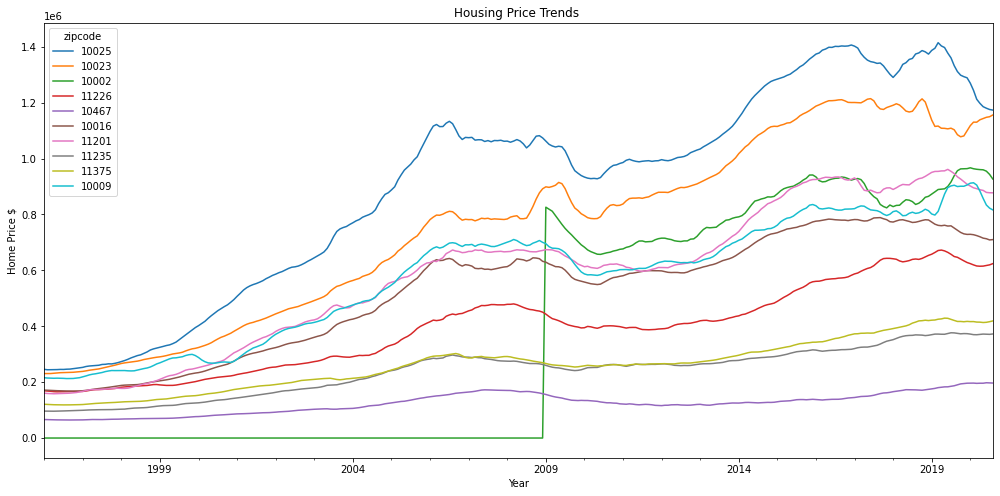

In [40]:
pl.plot(figsize=(17,8))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')

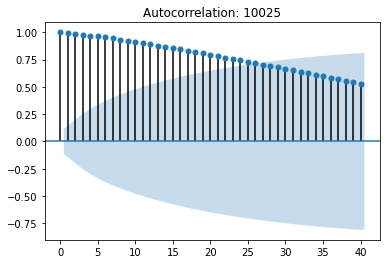

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
title = 'Autocorrelation: 10025'
lags = 40
plot_acf(df_ny['10025'],title=title,lags=lags);

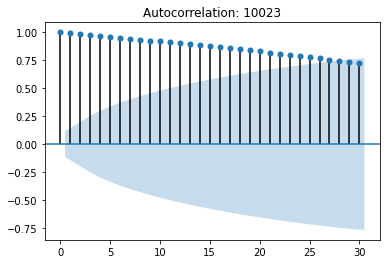

In [47]:
title = 'Autocorrelation: 10023'
lags = 30
plot_acf(df_ny['10023'],title=title,lags=lags);